In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\luish\OneDrive\Área de Trabalho\FIAP\FIAP Projetos Ano 2\FASE 06\PBI\ANALISE DE CONGLOMERADO - CENTROS DE LOGISTICA\Fiap On - Fase 6 - Geolocalização Dataset - Asset.csv"

In [3]:
# Carregando os dados
data = pd.read_csv(file_path)

# Convertendo latitude e longitude para float
data['latitude'] = data['latitude'].str.replace(',', '.').astype(float)
data['longitude'] = data['longitude'].str.replace(',', '.').astype(float)
data['price'] = data['price'].str.replace(',', '.').astype(float)

In [4]:
print(data.head())

   latitude  longitude  price
0 -21.59136  -51.06669  52.47
1 -21.28535  -49.65497  37.03
2 -22.02590  -47.06702  71.50
3 -21.91623  -46.68666  88.27
4 -22.47639  -46.63278  36.16


In [5]:
# Normalizando os dados de latitude e longitude
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['latitude', 'longitude']])

In [6]:
# Usando o método do cotovelo
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

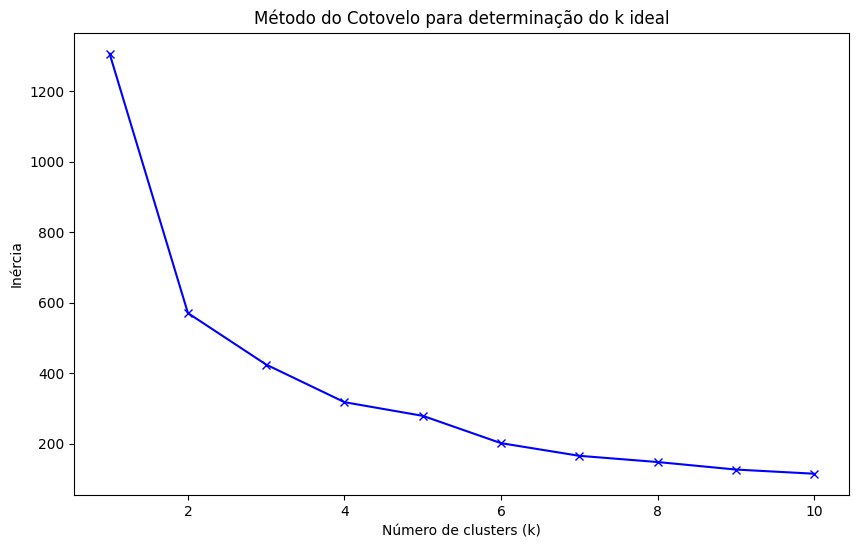

In [7]:
# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para determinação do k ideal')
plt.show()

In [8]:
## Aplicação do K-means

# Baseado no gráfico, escolhemos k=4 clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Adicionando as labels dos clusters ao dataframe
data['Cluster'] = kmeans.labels_

In [9]:
"""

Para cada grupo formado, determine o valor total das entregas que seriam atendidas por aquele centro, de acordo com a base recebida;

"""

# Calculando o valor total das entregas para cada cluster
cluster_totals = data.groupby('Cluster')['price'].sum()

print("Valor total das entregas para cada cluster:")
print(cluster_totals)

Valor total das entregas para cada cluster:
Cluster
0    11971.48
1    12425.34
2     7432.42
3     9354.57
Name: price, dtype: float64


In [10]:


# Calculando estatísticas adicionais
cluster_stats = data.groupby('Cluster').agg({
    'price': ['sum', 'mean', 'count'],
    'latitude': 'mean',
    'longitude': 'mean'
}).round(2)

cluster_stats.columns = ['Valor Total', 'Valor Médio', 'Número de Entregas', 'Latitude Média', 'Longitude Média']
cluster_stats = cluster_stats.sort_values('Valor Total', ascending=False)

print("\nEstatísticas detalhadas por cluster:")
print(cluster_stats)


Estatísticas detalhadas por cluster:
         Valor Total  Valor Médio  Número de Entregas  Latitude Média  \
Cluster                                                                 
1           12425.34        63.39                 196          -23.26   
0           11971.48        62.03                 193          -21.16   
3            9354.57        64.96                 144          -21.24   
2            7432.42        61.94                 120          -23.02   

         Longitude Média  
Cluster                   
1                 -46.69  
0                 -50.62  
3                 -48.14  
2                 -49.22  


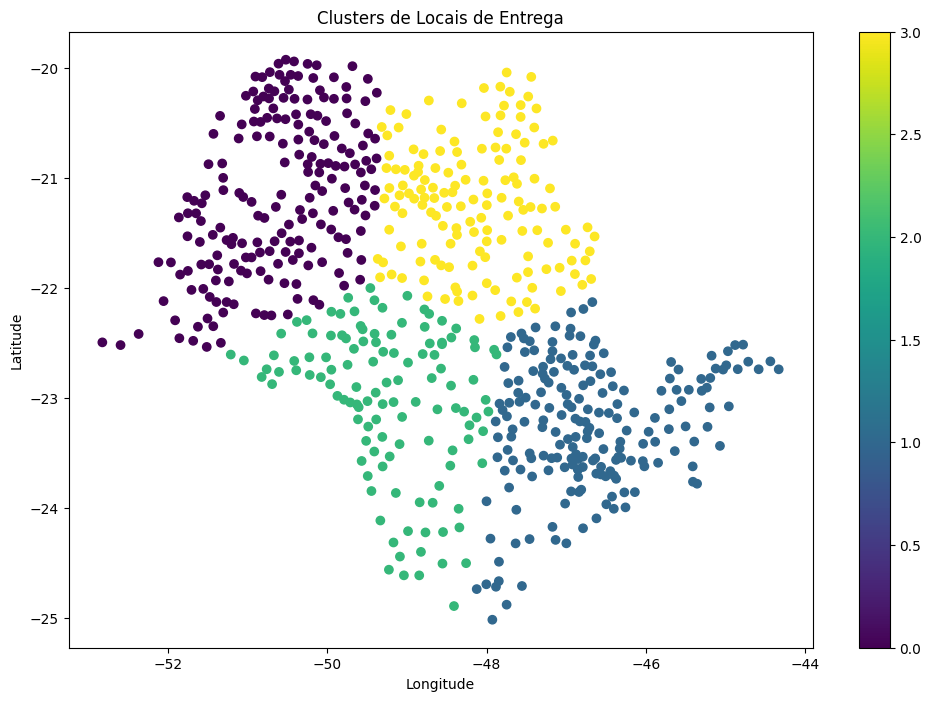

In [11]:
# Plotando os clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de Locais de Entrega')
plt.show()

In [12]:
"""

Algoritmo escolhido: K-means
Funcionamento do K-means:

Escolhe-se K pontos aleatórios como centroides iniciais.
Atribui cada ponto ao centroide mais próximo.
Recalcula os centroides com base nos pontos atribuídos.
Repete os passos 2 e 3 até convergir.

Método do Cotovelo:

Executa K-means com diferentes valores de K.
Plota a soma dos quadrados das distâncias dentro dos clusters (inércia) vs. K.
Escolhe-se o K onde há uma "dobra" no gráfico (semelhante a um cotovelo).

Razões da escolha:

Eficiente para dados geoespaciais
Resultados facilmente interpretáveis
Bom para grandes volumes de dados

Avaliação:
Positivos:

Identificou grupos de entrega distintos
Forneceu insights sobre valor total por área

Limitações:

Assume clusters circulares
Requer número predefinido de clusters
Sensível a outliers

Conclusão: A análise oferece uma base sólida para decisões de localização de centros de distribuição, mas deve ser complementada com análises adicionais e expertise em logística para uma estratégia mais robusta.

"""

'\n\nAlgoritmo escolhido: K-means\nFuncionamento do K-means:\n\nEscolhe-se K pontos aleatórios como centroides iniciais.\nAtribui cada ponto ao centroide mais próximo.\nRecalcula os centroides com base nos pontos atribuídos.\nRepete os passos 2 e 3 até convergir.\n\nMétodo do Cotovelo:\n\nExecuta K-means com diferentes valores de K.\nPlota a soma dos quadrados das distâncias dentro dos clusters (inércia) vs. K.\nEscolhe-se o K onde há uma "dobra" no gráfico (semelhante a um cotovelo).\n\nRazões da escolha:\n\nEficiente para dados geoespaciais\nResultados facilmente interpretáveis\nBom para grandes volumes de dados\n\nAvaliação:\nPositivos:\n\nIdentificou grupos de entrega distintos\nForneceu insights sobre valor total por área\n\nLimitações:\n\nAssume clusters circulares\nRequer número predefinido de clusters\nSensível a outliers\n\nConclusão: A análise oferece uma base sólida para decisões de localização de centros de distribuição, mas deve ser complementada com análises adicionais e 